In [1]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")

display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


Filtrando quantidade vagas em são paulo que seja gratuita.

In [3]:
df = pd.DataFrame(arquivo)



qt1 = df[df['MUNICIPIO'] == 'São Paulo']

qt = qt1[qt1['CATEGORIA_ADMINISTRATIVA'] != 'Privada com fins lucrativos']


faculdades_sp = qt[["MUNICIPIO", "AREA_OCDE_CINE", "QT_VAGAS_AUTORIZADAS",]].groupby(["MUNICIPIO","AREA_OCDE_CINE"]).sum()

qtt = faculdades_sp.sort_values(by='QT_VAGAS_AUTORIZADAS', ascending=False)

cursos_faculdades_sp = qtt.query('QT_VAGAS_AUTORIZADAS != 0')


display(cursos_faculdades_sp.head(10))

QT_VAGAS_AUTORIZADAS
MUNICIPIO AREA_OCDE_CINE                                                          
São Paulo Pedagogia                                                         157770
          Administração                                                     153550
          Fisioterapia                                                       87439
          Ciências contábeis                                                 82251
          Formação de professor de língua/literatura vern...                 74697
          Gestão de pessoas                                                  71802
          Engenharia de produção                                             62788
          Gestão de negócios                                                 61228
          Marketing                                                          60441
          Gestão financeira                                                  58520

In [4]:
dados = {
    'curso': [ 'Pedagogia', 'Administração','Fisioterapia','Ciências contábeis','Formação literatura','Gestão de pessoas','Engenharia de produção','Gestão de negócios','Marketing','Gestão financeira'],
    'qt': [157770,153550,87439,82251,74697,71802,62788,61228,60441,58520 ]
}

vagas_modalidade = pd.DataFrame(dados)

print(vagas_modalidade)

                    curso      qt
0               Pedagogia  157770
1           Administração  153550
2            Fisioterapia   87439
3      Ciências contábeis   82251
4     Formação literatura   74697
5       Gestão de pessoas   71802
6  Engenharia de produção   62788
7      Gestão de negócios   61228
8               Marketing   60441
9       Gestão financeira   58520


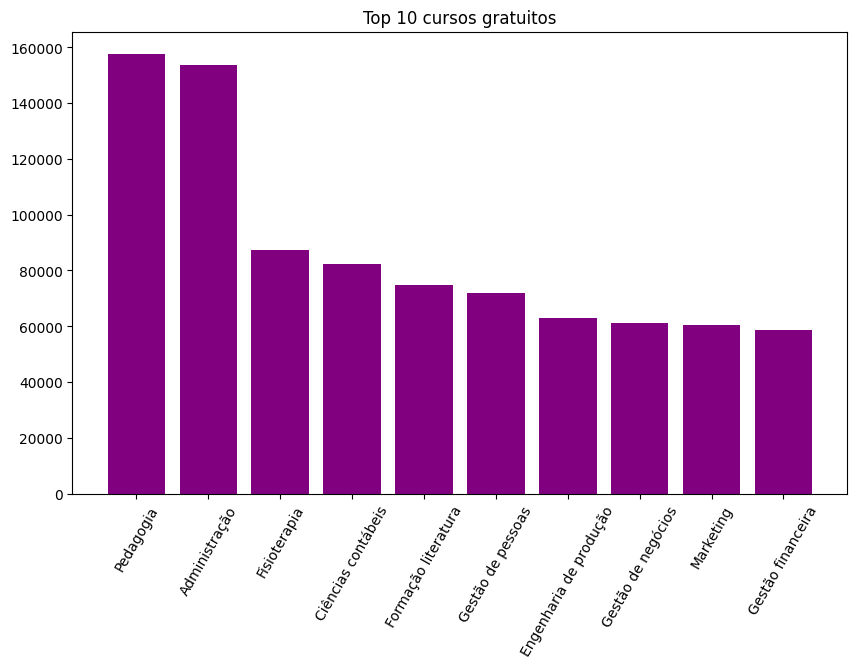

In [19]:
import matplotlib.pyplot as plt


modalidade = vagas_modalidade["curso"]   
qt = vagas_modalidade["qt"]
plt.figure(figsize=(10, 6))
plt.title("Top 10 cursos gratuitos")
plt.bar(modalidade, qt, color='purple', width=0.8)
plt.xticks(rotation=60)
plt.show()